#                Week 3 project         IBM Applied Data Science Capstone

## Part 1 of Clustering Toronto Dataset. 

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1)Start by creating a new Notebook for this assignment.


2)Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:


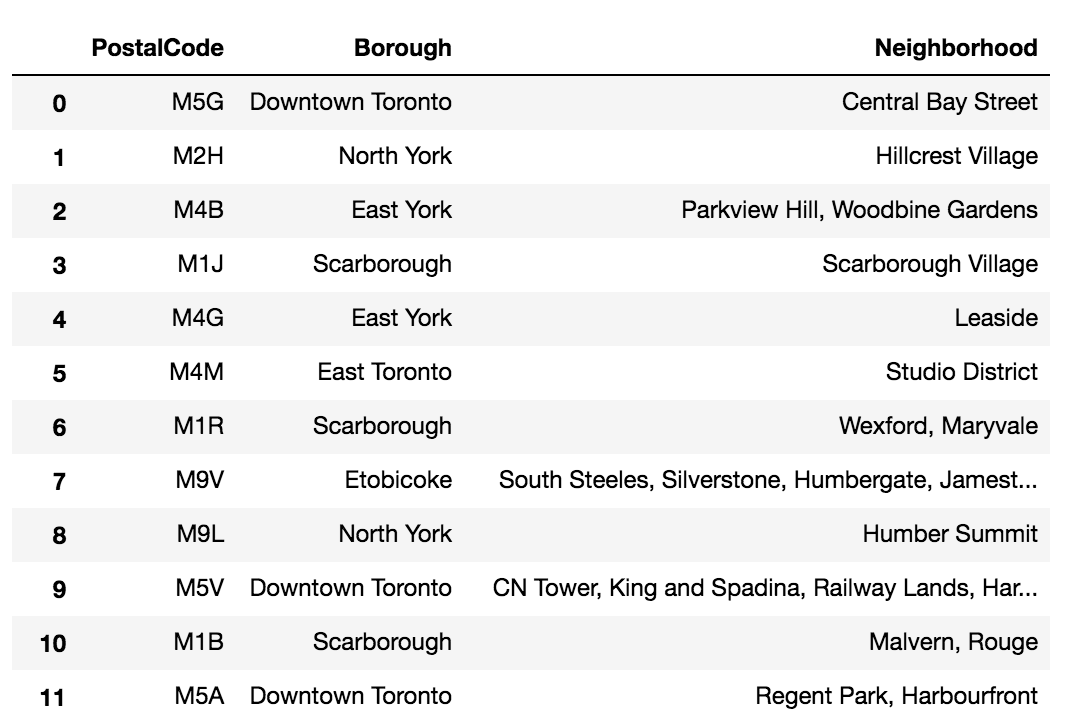

### Importing libraries

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:
page = urllib.request.urlopen(url)

In [4]:
soup = BeautifulSoup(page, "lxml")


In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XpjpzgpAMOIAA7ZZgy8AAABK","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":951325562,"wgRevisionId":951325562,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

Finding the table we need to scrape

In [6]:
tabels = soup.find_all("table")


[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal code
 </th>
 <th>Borough
 </th>
 <th>Neighborhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park / Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor / Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park / Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern / Rouge
 </td></tr>
 <tr>
 <td>M2B
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>
 <tr>

In [7]:
toronto_table = soup.find('table', class_= 'wikitable')

<table class="wikitable sortable">
<tbody><tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park / Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor / Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park / Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern / Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>Ea

Let us fill the lists with their respective data from the table.

In [8]:
postal_codes = []
boroughs = []
neighbourhoods = []


    
for row in toronto_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 1:
        postal = cells[0]
        postal_codes.append(postal.text)
            
        borough = cells[1]
        boroughs.append(borough.text)
            
        neighbourhood = cells[2]
        neighbourhoods.append(neighbourhood.text)  

Here we create a Data Frame to view the data in a tabular form.

In [9]:
df1 = pd.DataFrame()

In [10]:
df1['Postal Code']  = postal_codes
df1['Borough'] = boroughs
df1['Neighbourhood'] = neighbourhoods

In [11]:
df1.head()

,Postal Code,Borough,Neighbourhood
0,M1A\n,Not assigned\n,\n
1,M2A\n,Not assigned\n,\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,Regent Park / Harbourfront\n


In [12]:
df2 =  df1.copy()

In [13]:
df2.replace('\n','',regex=True,inplace=True)

In [14]:
df2.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


We remove the rows wherever the Borough is not assigned

In [15]:
df2 = df2[df2['Borough'] != 'Not assigned']

In [16]:
df2 = df2.reset_index()

In [17]:
df2 = df2.drop(['index'],axis=1)

In [18]:
df2.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [19]:
df2.shape

(103, 3)

In [20]:
df2['Neighbourhood'].isnull().unique()

array([False])

There are no cells in the Neighbourhood column that are empty.

# Part 2 of Clustering Toronto Dataset

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

Start by creating a new Notebook for this assignment.
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

3. To create the above dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook on your Github repository. (10 marks)

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code.

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:



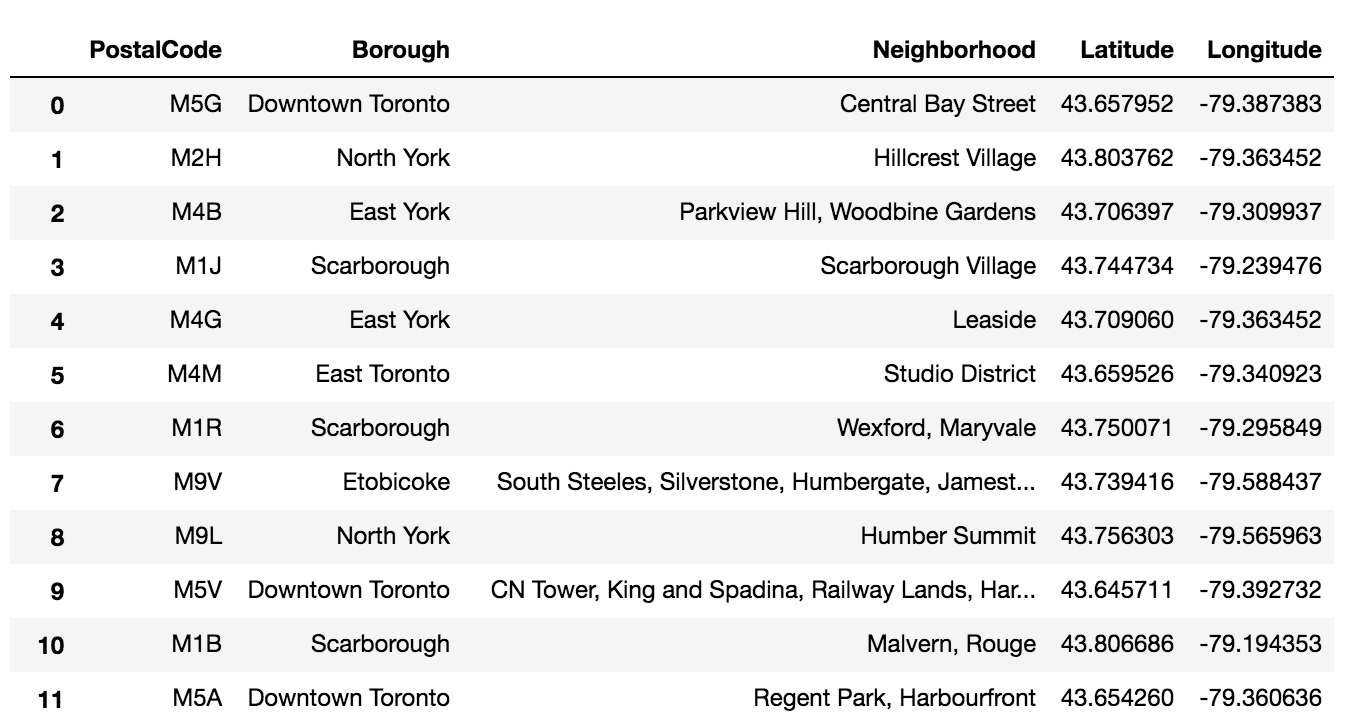

Finding the latitude and longitude for all the neighbourhood.

In [21]:
lat_lon_data = 'http://cocl.us/Geospatial_data'

In [22]:
tdf = pd.read_csv(lat_lon_data)
tdf.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [23]:
tdf.shape

(103, 3)

Since the number or rows in both the tables are same we can merge the two tables

In [24]:
df2.columns = ['PostalCode','Borough','Neighbourhood']
tdf.columns = ['PostalCode','Latitude','Longitude']

In [25]:
tdf_new = pd.merge(df2,tdf, on = 'PostalCode')
tdf_new.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


## Part 3 of Clustering Toronto Dataset

We will cluster the Downtown Toronto Borough in this assignment. 


Let us first import the required libraries

In [26]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

Let us create a new dataframe which contains only Downtown Toronto data.

In [29]:
downtown = tdf_new[tdf_new['Borough']=='Downtown Toronto'].reset_index(drop=True)
downtown.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


We need the geographical cordinates of Downtown Toronto.

In [30]:
address = 'Downtown Toronto, Toronto'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Manhattan are 43.6541737, -79.38081164513409.


Now we visualize the neighbourhood of Downtown Toronto.

In [32]:
map_dwntoronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(downtown['Latitude'], downtown['Longitude'], downtown['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_dwntoronto)  
    
map_dwntoronto

We use the Foursqaure API to explore and segment the Downtown Toronto Neighbourhoods

In [33]:
CLIENT_ID = 'LQVSD2WDF5LS553YM50BO30Z5EAGVMRZCNBPH3MCKWTX4JU0'
CLIENT_SECRET = '534URNMV5ZR2VC1OI4DMEJ310ROEPZ3HNOMJ0DBKA34U0SHE' 
VERSION = '20190605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LQVSD2WDF5LS553YM50BO30Z5EAGVMRZCNBPH3MCKWTX4JU0
CLIENT_SECRET:534URNMV5ZR2VC1OI4DMEJ310ROEPZ3HNOMJ0DBKA34U0SHE


#### Let us explore the first neighbourhood in our dataset

In [34]:
downtown.loc[0,'Neighbourhood']

'Regent Park / Harbourfront'

Let us find out the latitude and longitude of Regent Park/ Harbourfront

In [37]:
neighborhood_latitude = downtown.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = downtown.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = downtown.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park / Harbourfront are 43.6542599, -79.3606359.


## Now let us find out the venues which are near Regent Park / Harbourfront Area

In [38]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id=LQVSD2WDF5LS553YM50BO30Z5EAGVMRZCNBPH3MCKWTX4JU0&client_secret=534URNMV5ZR2VC1OI4DMEJ310ROEPZ3HNOMJ0DBKA34U0SHE&ll=43.6542599 ,-79.3606359&v=20190605&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=LQVSD2WDF5LS553YM50BO30Z5EAGVMRZCNBPH3MCKWTX4JU0&client_secret=534URNMV5ZR2VC1OI4DMEJ310ROEPZ3HNOMJ0DBKA34U0SHE&ll=43.6542599 ,-79.3606359&v=20190605&radius=500&limit=100'

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9a8529a2e538001bcb2e8f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 48,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

Creating a function that extracts category of the venue

In [40]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149


In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


## Let create a loop to find out all the venues similar to the previous neighbourhood

In [54]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:

downtown_toronto_venues = getNearbyVenues(names=downtown['Neighbourhood'],
                                   latitudes=downtown['Latitude'],
                                   longitudes=downtown['Longitude']
                                  )

Regent Park / Harbourfront
Queen's Park / Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond / Adelaide / King
Harbourfront East / Union Station / Toronto Islands
Toronto Dominion Centre / Design Exchange
Commerce Court / Victoria Hotel
University of Toronto / Harbord
Kensington Market / Chinatown / Grange Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Rosedale
Stn A PO Boxes
St. James Town / Cabbagetown
First Canadian Place / Underground city
Church and Wellesley


In [56]:
print(downtown_toronto_venues.shape)
downtown_toronto_venues.head()

(1215, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park / Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park / Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park / Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park / Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Regent Park / Harbourfront,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


let us check the number of venues for each neighbourhood

In [57]:
downtown_toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,56,56,56,56,56,56
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,18,18,18,18,18,18
Central Bay Street,59,59,59,59,59,59
Christie,18,18,18,18,18,18
Church and Wellesley,73,73,73,73,73,73
Commerce Court / Victoria Hotel,100,100,100,100,100,100
First Canadian Place / Underground city,100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
Harbourfront East / Union Station / Toronto Islands,100,100,100,100,100,100


## Let us find out how many unique categories can be curated from all the returned values

In [58]:
print('There are {} uniques categories.'.format(len(downtown_toronto_venues['Venue Category'].unique())))

There are 205 uniques categories.


### Analyze Each Neighbourhood

In [60]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighbourhood'] = downtown_toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Neighbourhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Regent Park / Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
downtown_onehot.shape

(1215, 206)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [69]:
downtown_grouped = downtown_onehot.groupby('Neighbourhood').mean().reset_index()
downtown_grouped.head()

,Neighbourhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.000000
1,CN Tower / King and Spadina / Railway Lands / ...,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.016949,0.0,0.0,0.0,0.0,0.016949
3,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.0,0.0,...,0.013699,0.013699,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.027397


Let's check the size of dataset

In [70]:
downtown_grouped.shape

(19, 206)

### Let's print each neighbourhood along with top 5 common venues

In [71]:
num_top_venues = 5

for hood in downtown_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.05
1        Cocktail Bar  0.05
2              Bakery  0.04
3  Italian Restaurant  0.04
4      Farmers Market  0.04


----CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3           Airport  0.06
4               Bar  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.22
1  Italian Restaurant  0.07
2      Sandwich Place  0.05
3                Café  0.05
4        Burger Joint  0.03


----Christie----
           venue  freq
0  Grocery Store  0.22
1           Café  0.17
2           Park  0.11
3      Nightclub  0.06
4          Diner  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1     Sushi Restaurant  0.07
2  Japanese Restaurant  0.05
3           Restaurant  0.04
4  

### Let us put that into a dataframe

Let's first sort the venues in descending order

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create a dataframe with top 10 venues in a given neighbourhood

In [75]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = downtown_grouped['Neighbourhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Cocktail Bar,Coffee Shop,Cheese Shop,Farmers Market,Bakery,Restaurant,Italian Restaurant,Beer Bar,Café,Seafood Restaurant
1,CN Tower / King and Spadina / Railway Lands / ...,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Bar,Boat or Ferry,Boutique
2,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Ice Cream Shop,Japanese Restaurant,Middle Eastern Restaurant
3,Christie,Grocery Store,Café,Park,Nightclub,Coffee Shop,Gas Station,Diner,Restaurant,Athletics & Sports,Italian Restaurant
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Yoga Studio,Men's Store,Burger Joint,Pub,Hotel,Mediterranean Restaurant


# Clustering the Neighbourhood

Using K-Means let us cluster the dataframe into 5 clusters.

In [77]:
# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 4, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a Dataframe that includes the cluster type and the top 10 venues of a neighbourhood

In [78]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

downtown_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,0,Coffee Shop,Bakery,Pub,Park,Café,Breakfast Spot,Theater,Restaurant,Beer Store,Ice Cream Shop
1,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494,4,Coffee Shop,Diner,Sushi Restaurant,Yoga Studio,Fried Chicken Joint,Café,Discount Store,Spa,Bar,Bank
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Tea Room,Restaurant,Diner
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Italian Restaurant,Gastropub,Cocktail Bar,American Restaurant,Department Store,Seafood Restaurant,Moroccan Restaurant,Cosmetics Shop
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Cocktail Bar,Coffee Shop,Cheese Shop,Farmers Market,Bakery,Restaurant,Italian Restaurant,Beer Bar,Café,Seafood Restaurant


In [79]:
downtown_merged.shape

(19, 16)

#####  Let's visualize the clustering

In [81]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighbourhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

# Let us now examine each cluster

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

### Cluster 1

In [82]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Bakery,Pub,Park,Café,Breakfast Spot,Theater,Restaurant,Beer Store,Ice Cream Shop
2,Downtown Toronto,0,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Tea Room,Restaurant,Diner
3,Downtown Toronto,0,Café,Coffee Shop,Italian Restaurant,Gastropub,Cocktail Bar,American Restaurant,Department Store,Seafood Restaurant,Moroccan Restaurant,Cosmetics Shop
4,Downtown Toronto,0,Cocktail Bar,Coffee Shop,Cheese Shop,Farmers Market,Bakery,Restaurant,Italian Restaurant,Beer Bar,Café,Seafood Restaurant
7,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Gym,Hotel,American Restaurant,Thai Restaurant,Deli / Bodega,Steakhouse,Bar
8,Downtown Toronto,0,Coffee Shop,Aquarium,Hotel,Italian Restaurant,Café,Restaurant,Fried Chicken Joint,Scenic Lookout,Brewery,Sporting Goods Shop
9,Downtown Toronto,0,Coffee Shop,Hotel,Café,Restaurant,Japanese Restaurant,American Restaurant,Seafood Restaurant,Salad Place,Breakfast Spot,Sporting Goods Shop
10,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Italian Restaurant,Japanese Restaurant,Deli / Bodega,Seafood Restaurant
11,Downtown Toronto,0,Café,Bookstore,Japanese Restaurant,Italian Restaurant,Bar,Bakery,Restaurant,Yoga Studio,Sushi Restaurant,Pub
12,Downtown Toronto,0,Café,Coffee Shop,Dessert Shop,Vietnamese Restaurant,Mexican Restaurant,Gaming Cafe,Bakery,Grocery Store,Bar,Vegetarian / Vegan Restaurant


### Cluster 2

In [83]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,1,Park,Trail,Playground,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


### Cluster 3

In [84]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,2,Grocery Store,Café,Park,Nightclub,Coffee Shop,Gas Station,Diner,Restaurant,Athletics & Sports,Italian Restaurant


### Cluster 4

In [85]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,3,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Bar,Boat or Ferry,Boutique


### Cluster 5

In [86]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 4, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,4,Coffee Shop,Diner,Sushi Restaurant,Yoga Studio,Fried Chicken Joint,Café,Discount Store,Spa,Bar,Bank
5,Downtown Toronto,4,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Ice Cream Shop,Japanese Restaurant,Middle Eastern Restaurant
